# Convolutional Neural Network

### Packages

In [3]:
# ----- Tensorflow -----
import tensorflow as tf
import tensorflow_datasets as tfds
from keras import regularizers as reg
from keras import optimizers
from keras.models import Model, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model

from keras.layers import Input, Dropout, Dense, Conv2D, MaxPooling2D, Flatten, Concatenate, AveragePooling2D

# ----- Utility functions -----
from utils import load_data, plot_hist

2023-01-25 21:20:59.336801: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/gustavchristensen/Documents/SDU/MSc. Data Science/3. Semester - DT/Anvendt Maskinlæring/applied_ML_faelles/assignment_2/.venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load Data

In [19]:
data_dir = '/Users/gustavchristensen/Documents/SDU/MSc. Data Science/3. Semester - DT/Anvendt Maskinlæring'
BATCH_SIZE = 32
train, test, val = load_data(data_dir, perc=8, batch_size=BATCH_SIZE)

### Architectures
- Consider and discuss alternative CNN model architectures

In [20]:
# ----- Small Convnet from DLPR -----
inputs = Input(shape=(96, 96, 3))
x = Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = Flatten()(x)
outputs = Dense(2, activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 47, 47, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 22, 22, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 20, 20, 128)       7385

In [21]:
# ----- Configure model -----
model.compile(optimizer='rmsprop',
			  loss='categorical_crossentropy',
			  metrics=['accuracy'])

# ----- Train model -----
history = model.fit(train,
					epochs = 15,
					validation_data= val)

# ----- Plot performance -----
plot_hist(history)

Epoch 1/15
656/656 [==============================] - 206s 312ms/step - loss: 0.5934 - accuracy: 0.7226 - val_loss: 0.5005 - val_accuracy: 0.7539
Epoch 2/15
656/656 [==============================] - 204s 310ms/step - loss: 0.4846 - accuracy: 0.7727 - val_loss: 0.4540 - val_accuracy: 0.7936
Epoch 3/15
656/656 [==============================] - 215s 327ms/step - loss: 0.4511 - accuracy: 0.7971 - val_loss: 0.5327 - val_accuracy: 0.7596
Epoch 4/15
656/656 [==============================] - 216s 329ms/step - loss: 0.4098 - accuracy: 0.8210 - val_loss: 0.5242 - val_accuracy: 0.7703
Epoch 5/15
656/656 [==============================] - 208s 317ms/step - loss: 0.3593 - accuracy: 0.8504 - val_loss: 0.5062 - val_accuracy: 0.7749
Epoch 6/15
656/656 [==============================] - 212s 323ms/step - loss: 0.2981 - accuracy: 0.8785 - val_loss: 0.9224 - val_accuracy: 0.7097
Epoch 7/15
656/656 [==============================] - 216s 329ms/step - loss: 0.2362 - accuracy: 0.9086 - val_loss: 0.7797 -

In [27]:
# ----- Larger Convnet from DLPR -----
inputs = Input(shape=(96, 96, 3))
x = Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = Flatten()(x)
outputs = Dense(2, activation="sigmoid")(x)
model = Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_39 (Conv2D)          (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 47, 47, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 22, 22, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 20, 20, 128)       738

## Alternative Optimizers
- Visualize impact on training/validation losses and accuracies

In [ ]:
# ----- SGD -----
opt1 = tf.keras.optimizers.SGD(learning_rate=0.001)

# ----- RMSProp -----
opt2 = tf.keras.optimizers.RMSprop(learning_rate=0.001)

# ----- Adagrad -----
opt3 = tf.keras.optimizers.Adagrad(learning_rate=0.001)

# ----- Adam -----
opt4 = tf.keras.optimizers.Adam(learning_rate=0.001)


Epoch 1/15
656/656 [==============================] - 306s 465ms/step - loss: 0.5857 - accuracy: 0.6984 - val_loss: 0.4871 - val_accuracy: 0.7596
Epoch 2/15
656/656 [==============================] - 289s 441ms/step - loss: 0.4860 - accuracy: 0.7789 - val_loss: 0.4472 - val_accuracy: 0.8027
Epoch 3/15
656/656 [==============================] - 283s 430ms/step - loss: 0.4502 - accuracy: 0.7981 - val_loss: 0.4529 - val_accuracy: 0.7875
Epoch 4/15
656/656 [==============================] - 286s 436ms/step - loss: 0.4271 - accuracy: 0.8156 - val_loss: 0.4065 - val_accuracy: 0.8207
Epoch 5/15
656/656 [==============================] - 290s 442ms/step - loss: 0.3940 - accuracy: 0.8329 - val_loss: 0.3993 - val_accuracy: 0.8302
Epoch 6/15
656/656 [==============================] - 300s 458ms/step - loss: 0.3644 - accuracy: 0.8502 - val_loss: 0.5575 - val_accuracy: 0.7894
Epoch 7/15
656/656 [==============================] - 297s 453ms/step - loss: 0.3132 - accuracy: 0.8739 - val_loss: 0.5483 -

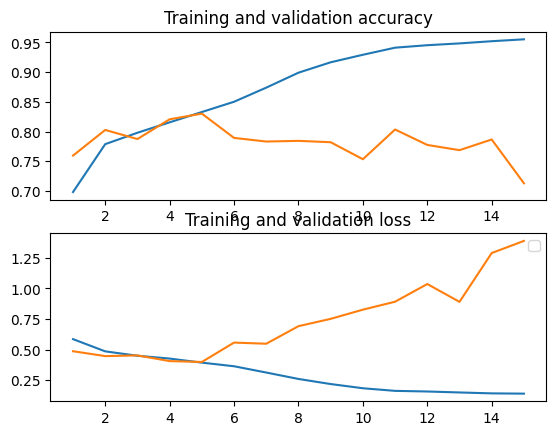

In [28]:
# ----- Configure model -----
model.compile(optimizer='rmsprop',
			  loss='categorical_crossentropy',
			  metrics=['accuracy'])

# ----- Train model -----
history = model.fit(train,
					epochs = 15,
					validation_data= val)

# ----- Plot performance -----
plot_hist(history)

## Data Augmentation
- Visualize impact on training/validation losses and accuracies
- Discuss data augmentation and its relation to overfitting